###  Assignment 02. Exploratory data analysis on haberman dataset

Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer.

The features of haberman dataset are,
i.age(age of the patients)
ii.year(year of surgery)
iii.nodes(number of lymph nodes with cancer cells)
iv.status(yeras of survival after surgery,if the number of years of survival is >= 5 years then status is marked as 1(long survival) and if the number of years of survival is less than 5,statusis marked as 2(short survival).


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Load haberman.csv into a pandas dataFrame.
haber = pd.read_csv("haberman.csv")

In [61]:
#Number of datapoints and features
print (haber.shape)

(306, 4)


In [62]:
#column names in the dataset
print (haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [63]:
#how many data points for each status class,status-1,patients survival 5 or more years,status-2,
#patients survival less than 5 years
haber["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

##### Observation:

From above code we can conclude that 225 patients out of 306 were survived more than 5 years and only 81 patients survived less than 5 years

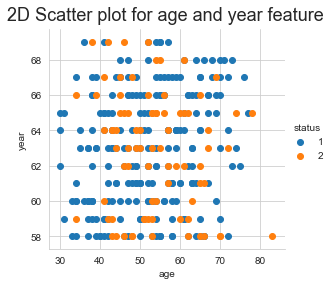

In [64]:
# 2-D Scatter plot with color-coding for each survival class type.
 
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend() \
   .fig.suptitle("2D Scatter plot for age and year feature",fontsize=18);
plt.subplots_adjust(top=.9)
plt.show();

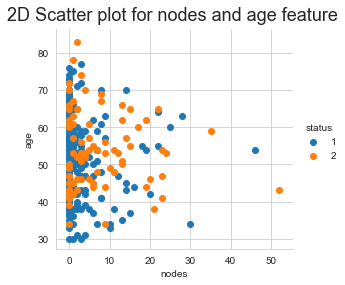

In [65]:
# 2-D Scatter plot with color-coding for each survival class type.
 
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="status", height=4) \
   .map(plt.scatter, "nodes", "age") \
   .add_legend() \
   .fig.suptitle("2D Scatter plot for nodes and age feature",fontsize=18);
plt.subplots_adjust(top=.9)
plt.show();

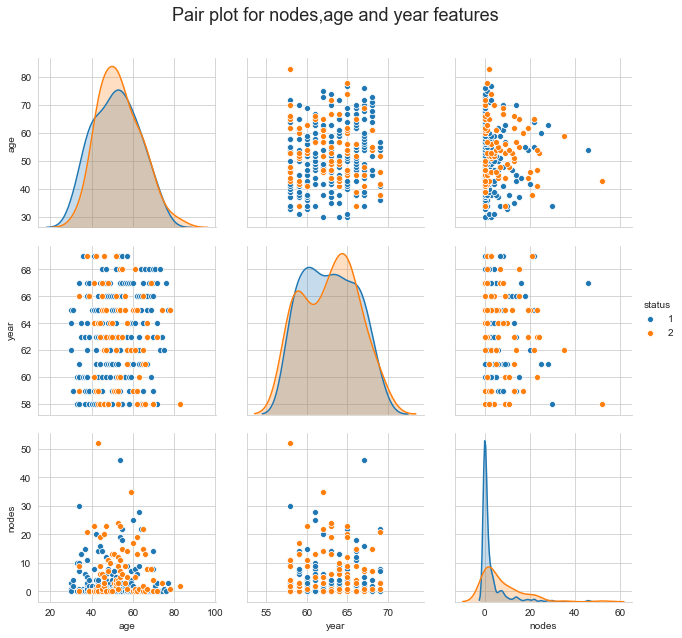

In [66]:
# Pair plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status", height=3, vars=['age','year','nodes']) \
   .fig.suptitle("Pair plot for nodes,age and year features",fontsize=18);
plt.subplots_adjust(top=.9)
plt.show()


In the above pair plots,

i.The diagonal plots are histogram
ii.Numbering the plots rowwise,we can observe that plots 2 and 4,plots 6 and 8 are rejected for our further analysis,as all the points are overlapping and will not be able to come to any conclusions.
iii.Plot 3 and plot 7 are mirror images and there are some non overlapping points but this plot is better than other plots.
Therefore we can consider the features age and nodes for further data analysis.

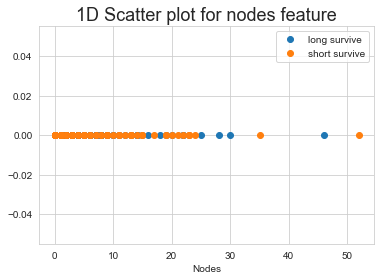

In [67]:
#1D scatter plot nodes

haberman_Long_Survive = haber.loc[haber["status"] == 1];
haberman_Short_Survive = haber.loc[haber["status"] == 2];
p1=plt.plot(haberman_Long_Survive['nodes'], np.zeros_like(haberman_Long_Survive['nodes']), 'o')
p2=plt.plot(haberman_Short_Survive["nodes"], np.zeros_like(haberman_Short_Survive['nodes']), 'o')
plt.title("1D Scatter plot for nodes feature",fontsize=18)
plt.legend(('long survive','short survive'))
plt.xlabel("Nodes")
plt.show()


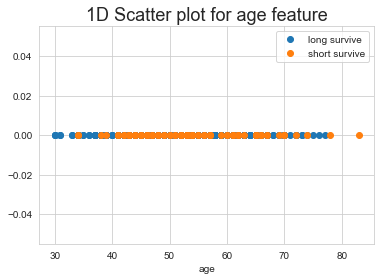

In [68]:
#1D scatter plot age

haberman_Long_Survive = haber.loc[haber["status"] == 1];
haberman_Short_Survive = haber.loc[haber["status"] == 2];
plt.plot(haberman_Long_Survive['age'], np.zeros_like(haberman_Long_Survive['age']), 'o')
plt.plot(haberman_Short_Survive['age'], np.zeros_like(haberman_Short_Survive['age']), 'o')
plt.title("1D Scatter plot for age feature",fontsize=18)
plt.legend(('long survive','short survive'))
plt.xlabel("age")
plt.show()

##### Observation:

It is observed that in the 1D scatter plots,most of the points are overlapping,therefore it is difficult to come to a conclusion.
Therefore we can proceed further to plot PDF and CDF for further analysis.

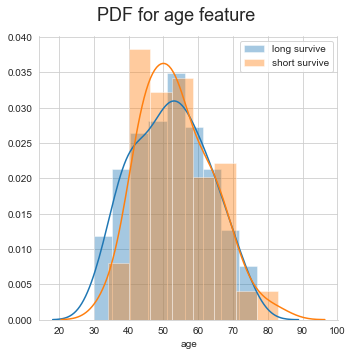

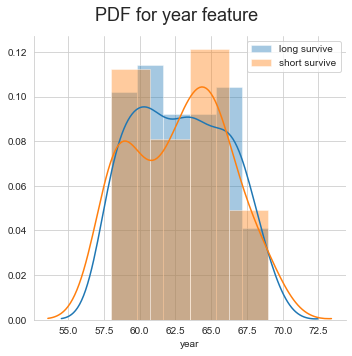

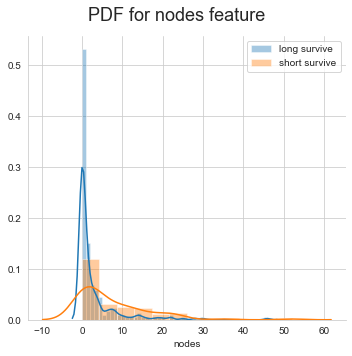

In [69]:
#Histogram, PDF

sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .fig.suptitle("PDF for age feature",fontsize=18);
plt.subplots_adjust(top=.9);
plt.legend(['long survive','short survive'])
plt.show();

sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .fig.suptitle("PDF for year feature",fontsize=18);
plt.subplots_adjust(top=.9);
plt.legend(['long survive','short survive'])
plt.show();

sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .fig.suptitle("PDF for nodes feature",fontsize=18);
plt.subplots_adjust(top=.9);
plt.legend(['long survive','short survive'])
plt.show();



##### Observation:

In the above PDF,we can observe that the PDFs of age and year of operation features are overlapping.
PDF of nodes has less overlapping points,therefor can be considered for analysis.

In the above PDF of nodes,we can oberseve that if the patients are observed with less nodes,their survival rates are high.
To observe the percentage of patients detail,we have to plot the CDF.

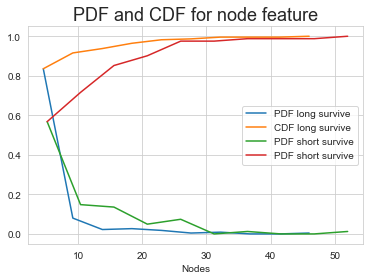

In [70]:
#CDF for long survival and short survival

counts, bin_edges = np.histogram(haberman_Long_Survive['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF long survive')
plt.plot(bin_edges[1:],cdf,label='CDF long survive')
plt.title("PDF and CDF for node feature",fontsize=18)
plt.xlabel("Nodes")


counts, bin_edges = np.histogram(haberman_Short_Survive['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF short survive')
plt.plot(bin_edges[1:],cdf,label='PDF short survive')
plt.legend();


##### Observation:

CDF of long survival is represented in orange color and short survival in red color in the above graph,
i.It can be observed that, 85 % of patients have a long survival if the number of nodes observed is <5.
ii.If the number of nodes observed > 45,100 % of patients have short survival.


In [71]:
#Analysis using standard deviation and mean
import numpy as np

print("Mean:")
print (np.mean(haberman_Long_Survive['nodes']))
print (np.mean(haberman_Short_Survive['nodes']))
print("\nStandard Deviation:")
print(np.std(haberman_Long_Survive['nodes']))
print(np.std(haberman_Short_Survive['nodes']))

Mean:
2.7911111111111113
7.45679012345679

Standard Deviation:
5.857258449412131
9.128776076761632


##### Observation:
For long survival the mean of nodes observed is 2.79 and for short survival the mean of nodes observed is 2.79.
The spread of data for short survival is more than the long survival.

In [72]:
#Median, Quantiles and Percentile

print("Medians:")
print(np.median(haberman_Long_Survive['nodes']))
print(np.median(haberman_Short_Survive['nodes']))
print("\nQuantiles:")
print(np.percentile(haberman_Long_Survive['nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive['nodes'],np.arange(0,100,25)))
print("\n90th percentile:")
print(np.percentile(haberman_Long_Survive['nodes'],90))
print(np.percentile(haberman_Short_Survive['nodes'],90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_Long_Survive['nodes']))
print(robust.mad(haberman_Short_Survive['nodes']))

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


##### Observaton:
i.Median: The central value of long survival is 0 nodes and short survival is 4 nodes.Patients who have an average of 4 nodes observed have short survival.
ii.For long survival,75% of the patients have number of observed nodes less than 3 i.e. only 25 % of the patients have number of observed nodes greater than 3.
iii.For short survival,75% of patients have a minimum 11 observed nodes.
iv.At 90th percentile,if the nodes observed is < 8 patient has long survival and if nodes >20 patient has short survival.

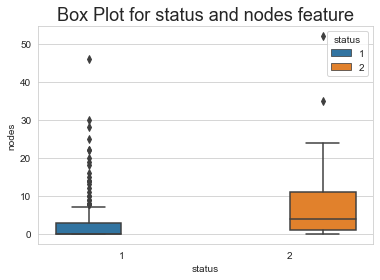

In [73]:
#Box Plot and Whiskers, Violin plot and Contour plot

sns.boxplot(x="status",y="nodes",hue="status",data=haber)
plt.title("Box Plot for status and nodes feature",fontsize=18)
plt.show()

##### Observation:
In the above Box and Whisker plots,
i.In long survival,the threshold value is 0 to 7 nodes and the short survial threshlod value of nodes observed is 0 to 25
ii.For the nodes observed between 0 to 7, we have both long survival and 50 % short survival status,therefore 50% short survival status data is inaccurate, as there are overlapping data points and may result in inaccurate prediction for short survival.  


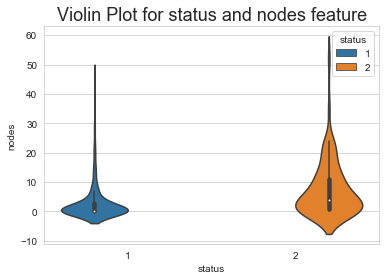

In [74]:
#Violin Plot

sns.violinplot(x="status", y="nodes",hue="status",data=haber)
plt.title("Violin Plot for status and nodes feature",fontsize=18)
plt.show()

##### Observation
In the above violin plot,it can be observed that long survival status of patients has a threshold value of 0 to 7 observed nodes and short survival status of patients has a threshold value of 0 to 20 nodes observed. 

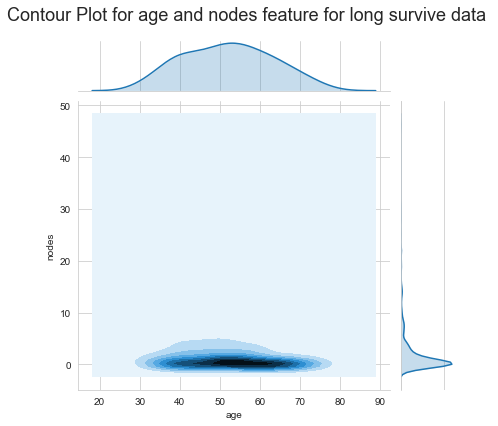

In [75]:
#contour plot

sns.jointplot(x='age',y='nodes',data=haberman_Long_Survive,kind='kde') \
   .fig.suptitle("Contour Plot for age and nodes feature for long survive data ",fontsize=18); 
plt.grid()
plt.subplots_adjust(top=.9);
plt.show()

##### Observation:
In the above contour plot for long survival,plotted between age and number of nodes observed ,the density of points is more between the age 45 to 60 and nodes 0 to 2.
Therefore it can be concluded that,if the patients age between 45 to 60 and number of observed nodes is less than 2 then the patients survive longer after surgery.

#### Observations Summary

i.In the haberman dataset,we can observe that the important featurefor our analyis is observed number of nodes.
ii.On further univariate analysis, on the number of nodes oberved,we were able to infer that if the number of obeserved nodes increses the survival status of patients move towards short survival status.
If the number of observed nodes is < 3 ,then for more than 75% of patients after surgery, the survival status is long survival.
iii.If the age of the patients is between 45 to 60 and number of nodes obserevd is less than 2,after surgery most of the patients survival status is long survival.


